***

# R2.07
## TP2. Parcours et application

***
***

Dans ce TP, tous les graphes seront orientés.

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

In [5]:
def infoOriente(A):
    """
     Renvoie caractéristiques essentielles du graphe orienté représenté par la matrice d'adjcence A

    :param A: matrice d'adjacence
    :type A:  numpy array carrée 
    :return: ordre [nombre de sommet] (int), taille [nombre d'arêtes] (int) et liste des degrés (array of int)
    :rtype: numpy array of int, int, numpy array
    """
    order=A.shape[0]
    
    degp=np.zeros(order,int)
    degm=np.zeros(order,int)
    
    
    for i in range(order):  #for each line
        for j in range(order): #for each column
            degp[i]=degp[i]+A[i][j]
            degm[i]=degm[i]+A[j][i]

            
    size=int(sum(degp))   #lemme des poignées de mains (orienté)
    return [order,size,degp,degm]

***
# <font color=blue>DFS, cycles et arcs</font> #
***

**To Do:**

**_question 1_**

Écrire un programme qui renvoie le (np.array) tableau des voisins d'un sommets $v$ dans un graphe donné par sa matrice d'adjacence.

In [6]:
##todo

def neighbours(A,v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of integer
    """
        
    
    neighbours=[]
    for j in range(A.shape[0]):
        if A[v][j]==1:
            neighbours.append(j)
    neighbours=np.asarray(neighbours)
    return neighbours


def neighbours2(A,v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of integer
    """
        

    return np.where(A[v]==1)[0]




A=np.array(
[[0,1,0,0,1], 
[1,0,1,1,0], 
[0,1,0,0,0], 
[0,1,0,0,1],
[1,0,0,1,0]])

print(neighbours2(A,0))

neighbours(A,0)
#should return [1,4]

[1 4]


array([1, 4])

On donne une implémentation (récursive) du parcours en profondeur. Prendre quelques minutes pour la comprendre.


(on supprimera ensuite les <tt>print</tt> intempestifs)

À quoi correspond <tt>T</tt> ? Le rajouter à la description de la fonction.

In [7]:
def DFS(A):
    """
    (recursive) DFS traversal of a graph
    
    [main function]

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  array[parent,begin,end]
    :return parent:  the array of parent of each vertex in the DFS tree
    :rtype parent: array of intergers    
    :return begin:  the array of times each vertex are seen for the first time in the traversal
    :rtype begin: array of intergers
    :return end:  the array of times each vertex are seen for the last time in the traversal
    :rtype end: array of intergers        
    """
            
                
    n=A.shape[0]

    color=-1*np.ones(n)
    parent=-1*np.ones(n)

    begin=-1*np.ones(n)
    end=-1*np.ones(n)
    date=0    
    
    T=np.zeros((n,n))
    for u in range(n):
        
        if color[u]==-1:
            color, T,parent, date,begin,end = DFS_rec(A,color,T,parent,date,begin,end,u)   
            
    return [parent,T,begin,end]





def DFS_rec(A,color,T,parent,date,begin,end,u):
    """
    (recursive) DFS traversal of a graph
    
    [auxilliary function, actual algoritm]
    
    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param color:  the array of colors of each vertex in the DFS tree
    :type color: array of intergers/strings        
    :param parent:  the array of parent of each vertex in the DFS tree
    :type parent: array of intergers  
    :param date: round in the DFS traversal
    :type date: integer
    :param begin:  the array of times each vertex are seen for the first time in the traversal
    :type begin: array of intergers
    :param end:  the array of times each vertex are seen for the last time in the traversal
    :type end: array of intergers       
    :param u: current vertex
    :type u: integer
    ##
    :return color:  the array of colors of each vertex in the DFS tree
    :rtype color: array of intergers/strings  
    :return:  array[color,parent,date,begin,end]
    :return parent:  the array of parent of each vertex in the DFS tree
    :rtype parent: array of intergers
    :return date: round in the DFS traversal
    :rtype date: integer    
    :return begin:  the array of times each vertex are seen for the first time in the traversal
    :rtype begin: array of intergers
    :return end:  the array of times each vertex are seen for the last time in the traversal
    :rtype end: array of intergers        
    """    
    
    
    color[u]= 0

    date=date+1

    begin[u]=date

    print(date)
    print("vertex",u)
    
    for v in neighbours(A,u):
        if color[v]==-1:
        
            parent[v]=u
            T[u][v]=1
            [color,T, parent, date,begin,end]=DFS_rec(A,color,T,parent,date,begin,end,v)
    color[u]=1
    end[u]=date
    date=date+1
    print("return",[color,T,parent,date,begin,end])
    return [color,T,parent,date,begin,end]

A=np.array([[0,1,0,0,0,0,0],[1,0,1,1,0,0,0],[0,1,0,0,1,0,0],[0,1,0,0,0,1,1],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]])

parent,T,begin,end = DFS(A)

1
vertex 0
2
vertex 1
3
vertex 2
4
vertex 4
return [array([ 0.,  0.,  0., -1.,  1., -1., -1.]), array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  0.,  1., -1.,  2., -1., -1.]), 5, array([ 1.,  2.,  3., -1.,  4., -1., -1.]), array([-1., -1., -1., -1.,  4., -1., -1.])]
return [array([ 0.,  0.,  1., -1.,  1., -1., -1.]), array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  0.,  1., -1.,  2., -1., -1.]), 6, array([ 1.,  2.,  3., -1.,  4., -1., -1.]), array([-1., -1.,  5., -1.,  4., -1., -1.])]
7
vertex 3
8
vertex 5
return [array([ 0.,  0.,  1.,  0.,  1.

On colorie les arêtes de l'arborescence donnée par le DFS




1
vertex 0
2
vertex 7
3
vertex 3
4
vertex 4
5
vertex 1
return [array([ 0.,  1., -1.,  0.,  0., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  4., -1.,  7.,  3., -1., -1.,  0., -1., -1.]), 6, array([ 1.,  5., -1.,  3.,  4., -1., -1.,  2., -1., -1.]), array([-1.,  5., -1., -1., -1., -1., -1., -1., -1., -1.])]
return [array([ 0.,  1., -1.,  0.,  1., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

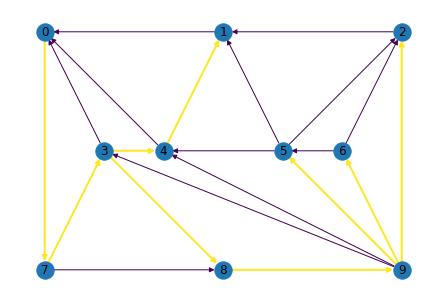

In [13]:


#Exemple du CM2
A=np.array([[0,1,0,0,0,0,0],[1,0,1,1,0,0,0],[0,1,0,0,1,0,0],[0,1,0,0,0,1,1],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]])

A=np.array([
[0,0,0,0,0,0,0,1,0,0],
[1,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0],
[1,0,0,0,1,0,0,0,1,0],
[1,1,0,0,0,0,0,0,0,0],
[0,1,1,0,1,0,0,0,0,0],
[0,0,1,0,0,1,0,0,0,0],
[0,0,0,1,0,0,0,0,1,0],
[0,0,0,0,0,0,0,0,0,1],
[0,0,1,1,1,1,1,0,0,0]
]
)

G=nx.from_numpy_array(A,create_using=nx.DiGraph())
#noter le mot clef "create_using" qui permet de préciser que l'on travaille avec un graphe
#orienté. Que se passe-t-il si on l'ommet ?

parent,T,begin,end = DFS(A)

pos=[
[0,0],[6,0],[12,0],
[2,-2],[4,-2],[8,-2],[10,-2],
[0,-4],[6,-4],[12,-4],
]
#positions des sommets, détermination manuelle


edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
#edges=np.array(G.edges)


colors=[T[u[0]][u[1]] for u in edges]
width=[1+T[u[0]][u[1]] for u in edges]
#Que fait-on ici ?


nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)
    


**Question 2**
On défini la fonction Cloture transitive <tt>Closure</tt> qui prend une matrice d'adjacence en entrée et renvoie une matrice d'adjacence. Expliquer ce que fait cette fonction.

[[0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]]
[[0. 1. 0. 1. 1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]]
[[0. 1.

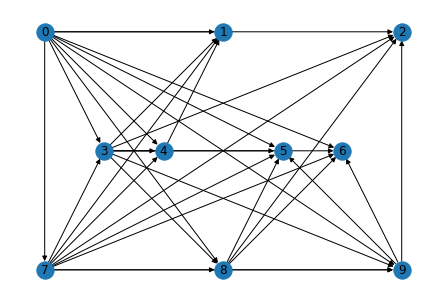

In [9]:
def Closure(A):
    '''
    Description de la fonction
    

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  TODO
    :rtype : numpy array of intergers    
    
    '''
    n=A.shape[0]
    C=A
    J=np.ones((n,n))
    for i in range(n-1):
        C=C+C@A
        C=np.minimum(C,J)
        print(C)
    return C


GC=nx.from_numpy_array(Closure(T),create_using=nx.DiGraph())
nx.draw(GC, pos=pos,with_labels=True)


**Question 3** 
À l'aide de <tt>DFS</tt> et  <tt>Closure</tt>, écrire une fonction qui colorie les arêtes d'un graphe selon leur type (couvrant, direct, transverse, retour) 

_remarque :_ il pourrait être plus élégant de rajouter un champs "couleur" aux arêtes dans networkx. On ne le fera pas pour limiter la dépendance à cette librairie.

1
vertex 0
2
vertex 7
3
vertex 3
4
vertex 4
5
vertex 1
return [array([ 0.,  1., -1.,  0.,  0., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  4., -1.,  7.,  3., -1., -1.,  0., -1., -1.]), 6, array([ 1.,  5., -1.,  3.,  4., -1., -1.,  2., -1., -1.]), array([-1.,  5., -1., -1., -1., -1., -1., -1., -1., -1.])]
return [array([ 0.,  1., -1.,  0.,  1., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

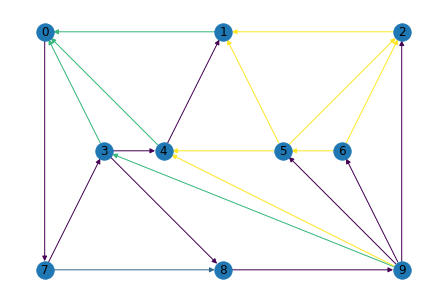

In [7]:
def Type(A):
    '''
   Donnes les arcs coloriés selon leurs types
    

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return: color an array of edge type
    :rtype : numpy array of integers    
    
    '''
    parent,T,begin,end = DFS(A)
    C=Closure(T)
    G=nx.from_numpy_array(A,create_using=nx.DiGraph())
    edges = np.array(G.edges())

    color = np.zeros(len(edges))
    for u in range(len(edges)):
        i,j=edges[u]
        if T[i][j]==1: #arborescence
            color[u]=1
        else :
            if C[i][j]==1: #direct
                color[u]=2
            else :
                if C[j][i]==1: #retour
                    color[u]=3
                    
                else :         #transverse
                    color[u]=4

    #nx.draw(G,edge_color=color,with_labels=True)                
    return color


color=Type(A)




nx.draw(G,pos=pos,edge_color=color,with_labels=True)                


*****
**To Do:**


**_question 4_**

Déterminer si un graphe orienté est un DAG

_bonus_ dans le cas contraire, donner les cycles


In [8]:
def isDAG(A):
    """
    returns True if A is a DAG, False otherwise  
    """
    
    return not(3 in Type(A))
    
isDAG(A)

1
vertex 0
2
vertex 7
3
vertex 3
4
vertex 4
5
vertex 1
return [array([ 0.,  1., -1.,  0.,  0., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  4., -1.,  7.,  3., -1., -1.,  0., -1., -1.]), 6, array([ 1.,  5., -1.,  3.,  4., -1., -1.,  2., -1., -1.]), array([-1.,  5., -1., -1., -1., -1., -1., -1., -1., -1.])]
return [array([ 0.,  1., -1.,  0.,  1., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

False


**Bonus** Écrire une fonction qui élimine d'un graphe orienté les arêtes retrogrades (ce qui permet d'obtenir un DAG)

1
vertex 0
2
vertex 7
3
vertex 3
4
vertex 4
5
vertex 1
return [array([ 0.,  1., -1.,  0.,  0., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  4., -1.,  7.,  3., -1., -1.,  0., -1., -1.]), 6, array([ 1.,  5., -1.,  3.,  4., -1., -1.,  2., -1., -1.]), array([-1.,  5., -1., -1., -1., -1., -1., -1., -1., -1.])]
return [array([ 0.,  1., -1.,  0.,  1., -1., -1.,  0., -1., -1.]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

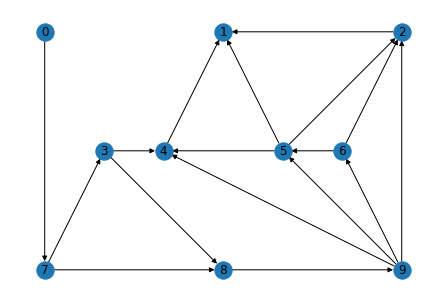

In [9]:
def ToDAG(A):
    '''
    Supprime les arêtes retour d'un graphe orienté
    

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return: the adjacency matrix of a DAG based on A
    :rtype : a two dimensional square numpy array containing only integers   
    
    '''    
    parent,T,begin,end = DFS(A)
    C=Closure(T)
    D=A

    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if not(T[i][j]==1) and C[j][i]==1: #arborescence
                D[i][j]=0
    return D

D=ToDAG(A)
GD=nx.from_numpy_array(D,create_using=nx.DiGraph())
nx.draw(GD,pos=pos,with_labels=True) 


print(D)

*****
on se donne la matrice d'adjacence d'un DAG

In [10]:
D=np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
, [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
, [0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
, [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
, [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
, [0, 0, 1, 0, 1, 1, 1, 0, 0, 0]])

isDAG(D)

1
vertex 0
2
vertex 2
3
vertex 1
return [array([ 0.,  1.,  0., -1., -1., -1., -1., -1., -1., -1.]), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([-1.,  2.,  0., -1., -1., -1., -1., -1., -1., -1.]), 4, array([ 1.,  3.,  2., -1., -1., -1., -1., -1., -1., -1.]), array([-1.,  3., -1., -1., -1., -1., -1., -1., -1., -1.])]
return [array([ 0.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.]), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0.

True

**_question 5_**

Écrire une fonction effectuant le tri par niveau d'un DAG

test [0 6 5 1 5 4 3 0 2 2]
[0 6 5 1 5 4 3 0 2 2]


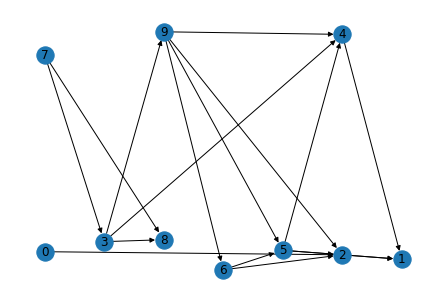

In [11]:
def TriNiveau(D):
    '''
    (recursive) Level sort of a DAG
    
    [main function]    

    :param D: the adjacency matrix
    :type D: a two dimensional square numpy array containing only integers
    :return: level of each vertex, proposed positionning
    :rtype : a  numpy array containing only integers, numpya array of coordinates 
    
    '''     
    order,size,degp,degm=infoOriente(D)
    N=-1*np.ones(order,int)
    pos=-1*np.ones((order,2))
    [NN,ppos]=TriNiveaurec(D,degm,N,0,pos)
    print("test",NN)
    return NN,ppos


def TriNiveaurec(D,deg,N,level,pos):
    '''
    (recursive) Level sort of a DAG
    
    [auxilliary function, actual algoritm]    

    :param D: the adjacency matrix
    :type D: a two dimensional square numpy array containing only integers
    :param deg: degrees
    :type deg: np array of int
    :param N: levels
    :type N: np array of int 
    :param level: current level
    :type level: int  
    :param pos: coordinates
    :type pos: np array of coordinates    
    :return: level of each vertex, proposed positionning
    :rtype : a  numpy array containing only integers, numpya array of coordinates 
    
    '''    
    degt=np.copy(deg)
    if -1 in N :
        cmp=0
        order=D.shape[0]
        for i in range(order) :
            if deg[i]==0 and N[i]==-1 :
                for j in range(order) :
                    if D[i][j]==1 :
                        degt[j]=degt[j]-1

                N[i]=level
                pos[i]=np.array([level,cmp+np.random.uniform(-0.1,0.1)]) #random to improve legibility
                cmp=cmp+1
                
        [N,pos]=TriNiveaurec(D,degt,N,level+1,pos)
    else :
        return [N,pos]
    
    return [N,pos]
 
[N,posTop] = TriNiveau(D)
print(N)
GD=nx.from_numpy_array(D,create_using=nx.DiGraph())
nx.draw(GD,pos=posTop,with_labels=True)    
   

**Bonus** Adapter l'affichage au tri par niveau